# Import

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# this library is used for drawing the charts easily.
# use this library to draw your charts in this homework.
!pip install -q git+https://github.com/MJAHMADEE/docs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from keras import backend as K
from keras.layers import Dense
from keras.models import Model

import os
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# 1.Prepare data

In [14]:
# unzip data and load them
!unzip /content/drive/MyDrive/time-series.zip -d /content/data/

Archive:  /content/drive/MyDrive/time-series.zip
  inflating: /content/data/4.csv     
  inflating: /content/data/5.csv     
  inflating: /content/data/6.csv     
  inflating: /content/data/7.csv     
  inflating: /content/data/8.csv     
  inflating: /content/data/9.csv     
  inflating: /content/data/10.csv    
  inflating: /content/data/11.csv    
  inflating: /content/data/12.csv    
  inflating: /content/data/13.csv    
  inflating: /content/data/14.csv    
  inflating: /content/data/15.csv    
  inflating: /content/data/16.csv    
  inflating: /content/data/17.csv    
  inflating: /content/data/18.csv    
  inflating: /content/data/19.csv    
  inflating: /content/data/20.csv    
  inflating: /content/data/21.csv    
  inflating: /content/data/22.csv    
  inflating: /content/data/23.csv    
  inflating: /content/data/24.csv    
  inflating: /content/data/25.csv    
  inflating: /content/data/26.csv    
  inflating: /content/data/27.csv    
  inflating: /content/data/28.csv    
 

In [15]:
directory = os.path.join("/content/data/")
csv_file = []
for root,dirs,files in os.walk(directory):
    for file in files:
       if file.endswith(".csv"):  
           df = pd.read_csv("/content/data/"+file)
           df["timestamp"] = pd.Series(df['timestamp'], dtype="int")
           csv_file.append(df)

In [4]:
# show chart of 5 dataset(csv file) randomly
print(csv_file[0])
print(csv_file[1])
print(csv_file[2])
print(csv_file[3])
print(csv_file[4])

       timestamp     value  label
0     1469203200 -0.201017      0
1     1469203500 -0.283928      0
2     1469203800 -0.105569      0
3     1469204100 -0.614691      0
4     1469204400 -0.746266      0
...          ...       ...    ...
8858  1471880100 -0.296199      0
8859  1471880400 -0.080123      0
8860  1471880700  0.061144      0
8861  1471881000  0.450105      0
8862  1471881300  0.684554      0

[8863 rows x 3 columns]
       timestamp        value  label
0     1416726000  -206.601939      0
1     1416729600   136.595836      0
2     1416733200  -125.936981      0
3     1416736800   753.121958      0
4     1416740400   407.953075      0
...          ...          ...    ...
1416  1421823600   797.847499      0
1417  1421827200  1207.875208      0
1418  1421830800  1349.758986      0
1419  1421834400  1421.276165      0
1420  1421838000  1395.888126      0

[1421 rows x 3 columns]
         timestamp   value  label
0       1491041280  1839.0      0
1       1491041340  1842.0    

In [16]:
# split data to train and test
csvmain = pd.concat(csv_file, ignore_index=True)
# csvmain["timestamp"] = pd.Series(csvmain['timestamp'], dtype="int")
# csvmain = csv_file[0]
# csvmain.sort_values(by=['timestamp'])

X = csvmain.loc[:, ['value']]
y = csvmain.loc[:, ['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .9)

Line graph: 


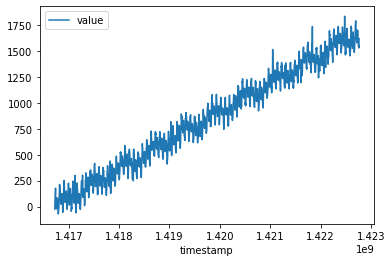

In [26]:
csv_file[40].plot(x='timestamp', y='value')

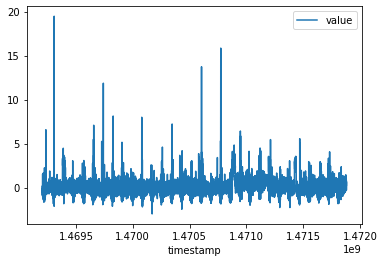

In [40]:
csv_file[0].plot(x='timestamp', y='value')

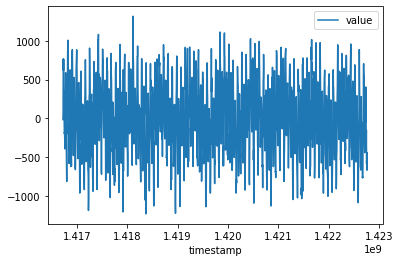

In [41]:
csv_file[20].plot(x='timestamp', y='value')

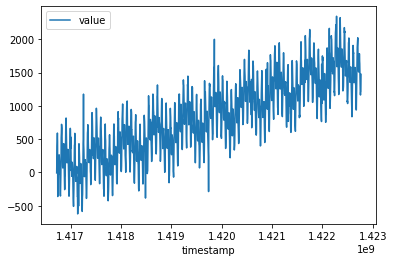

In [42]:
csv_file[60].plot(x='timestamp', y='value')

In [17]:
sequence = 200

In [18]:
def preprocessing_Y(df):  
  arr_1 = np.array([df["label"]])

  x =[]
  for i in range(len(arr_1[0])-sequence):
    if np.all(arr_1[0][i:i+sequence]==0):
      x.append(0)
    else:
      x.append(1)

  # print(x)
  hold = np.array(x).astype(int)
  return hold

In [19]:
def preprocessing_X(df):  
  arr_2 = np.array([df["value"]])


  x, y = [], []
  for i in range(len(arr_2[0])-sequence):
    x.append([arr_2[0][i:i+sequence]])

  # print(x)
  hold = np.array(x).astype(int)

  return hold

In [20]:
A = preprocessing_X(X)
B = preprocessing_Y(y)

# Metric functions

In [9]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 3. Create and train 3 RNN model(Simple, LSTM, GRU)

In [ ]:
# Simple
from tensorflow.keras import regularizers

model_RNN = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=sequence,  input_shape=(1,sequence)),
                             tf.keras.layers.Dense(sequence, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model_RNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_RNN.summary()

history_RNN = model_RNN.fit(A, B, epochs=100, verbose=1,validation_split=0.2,batch_size=64,
                            callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 200)               80200     
                                                                 
 dense_37 (Dense)            (None, 200)               40200     
                                                                 
 dense_38 (Dense)            (None, 1)                 201       
                                                                 
Total params: 120,601
Trainable params: 120,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18916/18916 [==============================] - 111s 6ms/step - loss: 0.0843 - accuracy: 0.8989 - recall_m: 0.1662 - precision_m: 0.5186 - f1_score_m: 0.2367 - val_loss: 0.0980 - val_accuracy: 0.8847 - val_recall_m: 0.0240 - val_precision_m: 0.0367 - val_f1_score_m: 0.0255
Epoch 2/100
18916/18916 [=

In [ ]:
# LSTM
model_LSTM = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=sequence,  input_shape=(1,sequence)),
                             tf.keras.layers.Dropout(.1),
                             tf.keras.layers.Dense(sequence, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model_LSTM.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_LSTM.summary()

history_LSTM = model_LSTM.fit(A, B, epochs=100, verbose=1,validation_split=0.2,batch_size=64,callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 200)               320800    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_41 (Dense)            (None, 200)               40200     
                                                                 
 dense_42 (Dense)            (None, 1)                 201       
                                                                 
Total params: 361,201
Trainable params: 361,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18916/18916 [==============================] - 189s 10ms/step - loss: 0.0833 - accuracy: 0.8999 - recall_m: 0.1819 - precision_m: 0.5424 - f1_score_m: 0.2565 - val_los

In [32]:
# GRU
model_GRU = tf.keras.Sequential([
                             tf.keras.layers.GRU(units=sequence,  input_shape=(1,sequence)),
                             tf.keras.layers.Dropout(.1),
                             tf.keras.layers.Dense(sequence, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model_GRU.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_GRU.summary()

history_GRU = model_GRU.fit(A, B, epochs=100, verbose=1,validation_split=0.2,batch_size=64,callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 200)               241200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 281,601
Trainable params: 281,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18916/18916 [==============================] - 400s 21ms/step - loss: 0.0890 - accuracy: 0.8927 - recall_m: 0.1979 - precision_m: 0.5649 - f1_score_m: 0.2765 - val_loss: 

# 4. Preprocces data to get better performance

In [12]:
from sklearn import preprocessing

In [12]:
# Preprocces method 1
# we used shuffel 

# csvmain = pd.concat(csv_file, ignore_index=True)
# csvmain["timestamp"] = pd.Series(csvmain['timestamp'], dtype="int")
# # csvmain = csv_file[0]
# csvmain = csvmain.sample(frac = 1)

# features = ['timestamp','value']
# X = csvmain.loc[:, features]
# y = csvmain.loc[:, ['label']]
scaler = preprocessing.StandardScaler().fit(X)

In [13]:
scaler.mean_

array([6566.65945079])

In [14]:
# Preprocces method 2
# Normalization(L2)


In [21]:
def preprocessing_X_new(df): 
  arr_2 = np.array([df["value"]])
  arr_2 = preprocessing.normalize(arr_2, norm='l2')

  x, y = [], []
  for i in range(len(arr_2[0])-sequence):
    x.append(arr_2[0][i:i+sequence])

  return np.array(x)

In [22]:
A_new = preprocessing_X_new(X)

In [17]:
A_new.shape

(1513281, 200)

In [18]:
# Train 3 models again
# Simple
from tensorflow.keras import regularizers

model_RNN = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=sequence,  input_shape=(1,sequence)),
                             tf.keras.layers.Dense(sequence, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model_RNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_RNN.summary()

history_RNN_new = model_RNN.fit(A, B, epochs=100, verbose=1,validation_split=0.2,batch_size=64,
                            callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 200)               80200     
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 120,601
Trainable params: 120,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18916/18916 [==============================] - 249s 13ms/step - loss: 0.0897 - accuracy: 0.8917 - recall_m: 0.1845 - precision_m: 0.5482 - f1_score_m: 0.2601 - val_loss: 0.0744 - val_accuracy: 0.9155 - val_recall_m: 0.0147 - val_precision_m: 0.0177 - val_f1_score_m: 0.0146
Epoch 2/100
18916/18916 [===

In [19]:
# LSTM
model_LSTM = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=sequence,  input_shape=(1,sequence)),
                             tf.keras.layers.Dense(sequence, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model_LSTM.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_LSTM.summary()

history_LSTM_new = model_LSTM.fit(A, B, epochs=100, verbose=1,validation_split=0.2,batch_size=64,callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 361,201
Trainable params: 361,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18916/18916 [==============================] - 319s 17ms/step - loss: 0.0882 - accuracy: 0.8933 - recall_m: 0.2088 - precision_m: 0.5766 - f1_score_m: 0.2889 - val_loss: 0.0767 - val_accuracy: 0.9165 - val_recall_m: 0.0155 - val_precision_m: 0.0191 - val_f1_score_m: 0.0155
Epoch 2/100
18916/18916 [=

In [25]:
# GRU
model_GRU = tf.keras.Sequential([
                             tf.keras.layers.GRU(units=sequence,  input_shape=(1,sequence)),
                             tf.keras.layers.Dense(sequence, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model_GRU.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_GRU.summary()

history_GRU_new = model_GRU.fit(A, B, epochs=100, verbose=1,validation_split=0.2,batch_size=64,callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 200)               241200    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 281,601
Trainable params: 281,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18916/18916 [==============================] - 449s 24ms/step - loss: 0.0885 - accuracy: 0.8929 - recall_m: 0.2013 - precision_m: 0.5692 - f1_score_m: 0.2808 - val_loss: 0.0750 - val_accuracy: 0.9159 - val_recall_m: 0.0164 - val_precision_m: 0.0205 - val_f1_score_m: 0.0166
Epoch 2/100
18916/18916 [=

Based on val_f1_score_m, we can say that in this models:
  # GRU > RNN > LSTM

# 6. Train a self supervise model

In [26]:
sequence = 100

In [27]:
def preprocessing_X_new(df):  
  arr_2 = np.array([df["value"]])

  x, y = [], []
  for i in range(len(arr_2[0])-sequence-1):
    x.append([arr_2[0][i:i+sequence]])

  # print(x)
  hold = np.array(x)

  return hold

def preprocessing_Y_new(df):  
  arr_2 = np.array([df["value"]])

  x, y = [], []
  for i in range(len(arr_2[0])-sequence-1):
    x.append([arr_2[0][i+sequence-1]])

  # print(x)
  hold = np.array(x)

  return hold

In [28]:
A_new = preprocessing_X_new(X)
B_new = preprocessing_Y_new(X)

In [29]:
# compile and train the model


model_LSTM = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=sequence,  input_shape=(1,sequence)),
                             tf.keras.layers.Dense(sequence, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model_LSTM.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_LSTM.summary()

history_LSTM_ss = model_LSTM.fit(A_new, B_new, epochs=100, verbose=1,validation_split=0.2,batch_size=64,callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 90,601
Trainable params: 90,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18918/18918 [==============================] - 119s 6ms/step - loss: 41237676032.0000 - accuracy: 0.1050 - recall_m: 0.9972 - precision_m: 0.9957 - f1_score_m: 0.9964 - val_loss: 23096180.0000 - val_accuracy: 2.6431e-04 - val_recall_m: 0.9825 - val_precision_m: 2115.1482 - val_f1_score_m: 0.9823
Epoch

In [54]:
# delete last layer of model
model_LSTM_new = tf.keras.Sequential()

for layer in model_LSTM.layers[:-1]: 
  model_LSTM_new.add(layer)

model_LSTM_new.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
Total params: 90,500
Trainable params: 0
Non-trainable params: 90,500
_________________________________________________________________


In [55]:
# freeze all remaining layers except the last one

for layer in model_LSTM_new.layers[:-1]:
    layer.trainable = False

In [56]:
# add 2 dence layer to the model
model_LSTM_new.add(tf.keras.layers.Dense(10, activation='relu'))
model_LSTM_new.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [59]:
def preprocessing_Y(df):  
  arr_1 = np.array([df["label"]])

  x =[]
  for i in range(len(arr_1[0])-sequence):
    if np.all(arr_1[0][i:i+sequence]==0):
      x.append(0)
    else:
      x.append(1)

  # print(x)
  hold = np.array(x).astype(int)
  return hold

In [58]:
def preprocessing_X_new(df): 
  arr_2 = np.array([df["value"]])
  arr_2 = preprocessing.normalize(arr_2, norm='l2')

  x, y = [], []
  for i in range(len(arr_2[0])-sequence):
    x.append(arr_2[0][i:i+sequence])

  return np.array(x)

In [60]:
A = preprocessing_X(X)
B = preprocessing_Y(y)

In [61]:
# train the main task(anomaly detection)
model_LSTM_new.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_LSTM_new.summary()

his_model_LSTM_new = model_LSTM_new.fit(A, B, epochs=100, verbose=1,validation_split=0.2,batch_size=64,callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 91,521
Trainable params: 1,021
Non-trainable params: 90,500
_________________________________________________________________
Epoch 1/100
18918/18918 [==============================] - 74s 4ms/step - loss: 0.0633 - accuracy: 0.9216 - recall_m: 0.0907 - precision_m: 0.2584 - f1_score_m: 0.1222 - val_los

Did you get a better result?
 # NO

# 7. Handle unbalanced data problem

I tried many case to handle this event! Howerver, none of them was success.

The appropriate handler for this part is using class weights,though, it just accept label in lower than 2 dims. Our y_train has 20 dims!

In [6]:
sequence = 200

In [7]:
def preprocessing_X(df):  
  arr_2 = np.array([df["value"]])

  x, y = [], []
  for i in range(len(arr_2[0])-sequence-1):
    x.append([arr_2[0][i:i+sequence]])

  # print(x)
  hold = np.array(x)

  return hold


In [15]:
def preprocessing_Y(df):  
  arr_1 = np.array([df["label"]])

  x =[]
  for i in range(len(arr_1[0])-sequence):
    if np.all(arr_1[0][i:i+sequence]==0):
      x.append(0)
    else:
      x.append(1)

  # print(x)
  hold = np.array(x).astype(int)
  return hold

In [9]:
A = preprocessing_X(X)
B = preprocessing_Y(y)

In [10]:
def generate_sample_weights(training_data, class_weight_dictionary): 
    sample_weights = [class_weight_dictionary[np.where(one_hot_row==1)[0][0]] for one_hot_row in training_data]
    return np.asarray(sample_weights)

In [19]:
unique, counts = np.unique(B, return_counts=True)
num = dict(zip(unique, counts))

In [20]:
class_weight = {0: 1,
                1: (num[0]/num[1])}
# LSTM
model_LSTM = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=sequence,  input_shape=(1,sequence)),
                             tf.keras.layers.Dense(sequence, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model_LSTM.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy',recall_m,precision_m,f1_score_m])
model_LSTM.summary()

history_LSTM_new = model_LSTM.fit(A, B, epochs=100, verbose=1,validation_split=0.2,batch_size=64,callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True),
                                            class_weight =class_weight)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_6 (Dense)             (None, 200)               40200     
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 361,201
Trainable params: 361,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18916/18916 [==============================] - 231s 12ms/step - loss: 0.3719 - accuracy: 0.7619 - recall_m: 0.5059 - precision_m: 0.3454 - f1_score_m: 0.3589 - val_loss: 0.1600 - val_accuracy: 0.9112 - val_recall_m: 0.0248 - val_precision_m: 0.0259 - val_f1_score_m: 0.0240
Epoch 2/100
18916/18916 [=

# 8. Statistical method for anomaly detection

In [ ]:
mean = np.mean(np.array([csvmain["value"]]))
std = np.std(np.array([csvmain["value"]]))
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 6566.659450792839
std. deviation is 181523.86640913255


In [ ]:
threshold = 1
outlier = []
for i in np.array([csvmain["value"]])[0]:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [385974.0, 5672537.0, 6137598.0, 6287383.0, 6432308.0, 6508432.0, 6549646.0, 6425122.0, 6394650.0, 6583999.0, 6702820.0, 6810665.0, 6933764.0, 6998573.0, 6954333.0, 6859216.0, 6413081.0, 5555578.0, 4951760.0, 4630941.0, 4436129.0, 4325486.0, 4351925.0, 4543583.0, 5144027.0, 5728072.0, 6278373.0, 6427613.0, 6499127.0, 6527612.0, 6487843.0, 6382173.0, 6336180.0, 6491087.0, 6653153.0, 6797699.0, 6860933.0, 6896223.0, 6862816.0, 6792429.0, 6461352.0, 5607012.0, 5004276.0, 4592193.0, 4476948.0, 4363292.0, 4361465.0, 4587468.0, 5144174.0, 5852746.0, 6240918.0, 6354072.0, 6632705.0, 6494849.0, 6432447.0, 6358303.0, 6338294.0, 6555386.0, 6917160.0, 6985742.0, 6957827.0, 6968296.0, 6424790.0, 6452954.0, 6396051.0, 5615112.0, 4997594.0, 4640227.0, 4446677.0, 3894358.0, 4333245.0, 4588276.0, 5176114.0, 5860921.0, 6303637.0, 6374797.0, 6370847.0, 6446197.0, 6560011.0, 6394519.0, 6378939.0, 6437646.0, 6538304.0, 6723370.0, 6719247.0, 6698006.0, 6724209.0, 6674355.0, 6372073.0,

In [ ]:
real_abn = csvmain.loc[csvmain['label'] == 1]["value"].values.tolist()

In [ ]:
[i for i, j in zip(outlier, real_abn) if i == j]

[]

Z score is bulls*it :)